In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [7]:
path = 'out/VGG16_GGNDiag.npz'


In [4]:
def load_data(path, show_stats=True):
    a = np.load(path, allow_pickle=True)
    diagonal = a['eigvals']
    if show_stats:
        print("Length of data " + str(path) + ": " + str(len(diagonal)))
        print("Max: " + str(np.nanmax(diagonal)))
        print("Min: " + str(np.nanmin(diagonal)))
        print("Mean: " + str(np.nanmean(diagonal)))
        print("Std: " + str(np.std(diagonal)))
    return diagonal

In [5]:
def plot_histogram(data: np.ndarray, logy=False, **kwargs):
    assert data.ndim == 1, " expected nim == 1, but got " + str(data.ndim)
    sns.distplot(data, **kwargs)
    if logy:
        plt.yscale('log')

In [10]:
a = load_data(path)
plt.figure(figsize=[20, 10])
plt.xlim([0, 7])
plot_histogram(a, logy=True, kde=False, norm_hist=True, bins=200)

a = np.load("out/VGG16_GGNSpectrum.npz")
eig = []
weight = []
for i in range(0,len(a.f.eigvals)):
    eig.append(a.f.eigvals[i,0])
    weight.append(a.f.gammas[i])
#scaler = max(eig)   
#eig = np.array(eig) / scaler
markerline, stemlines, baseline = plt.stem(eig, weight, '-', linefmt='black')
#plt.xlabel('Eigenvalue Size')
#plt.ylabel('Spectral Density')

plt.yscale('log')
plt.xscale('linear')
plt.setp(baseline, color='r', linewidth=2)
plt.rcParams["figure.figsize"] = (10,2.5)


plt.xticks(np.around(np.arange(min(eig), max(eig), (max(eig)-min(eig))/3), 2))
#plt.xticks(list(plt.xticks()[0])+[max(eig)])
axes = plt.gca()
axes.set_xlim([0, 7])
plt.grid(True)


Length of data out/VGG16_GGNDiag.npz: 15291300
Max: 6.7665977
Min: 0.0
Mean: 0.010551685
Std: 0.031452


/home/xingchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import semicircular
import os
from scipy import optimize

In [37]:
plt.rcParams.update({'font.size': 12})
plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=12)
from matplotlib.ticker import FormatStrFormatter


/home/xingchen/anaconda3/envs/curvature/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


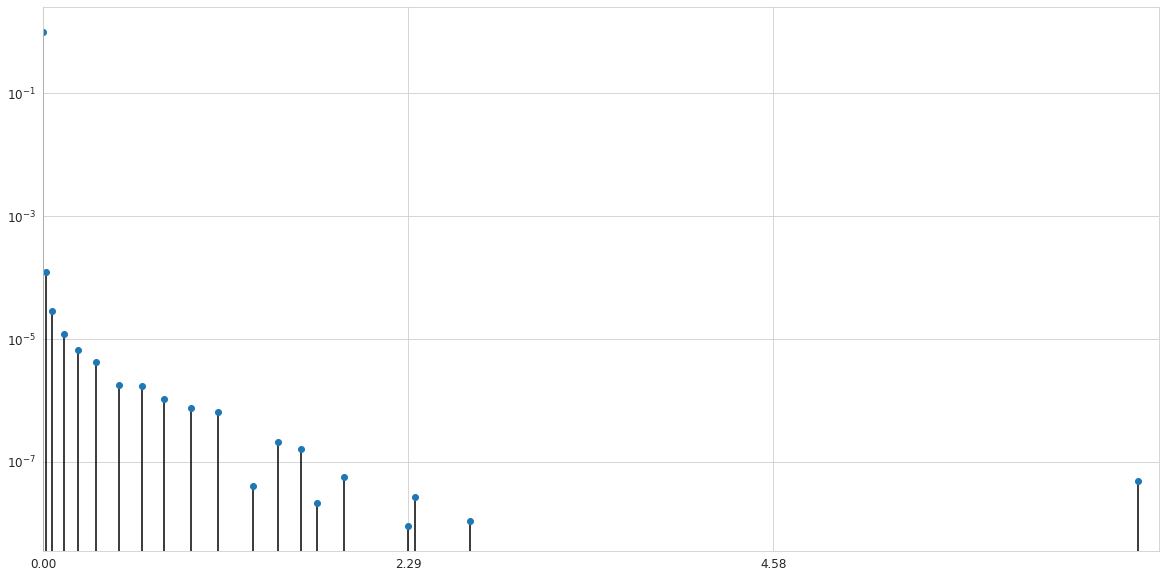

In [55]:
plt.figure(figsize=[20, 10])
a = np.load("out/VGG16_GGNSpectrum.npz")
eig = []
weight = []
for i in range(0,len(a.f.eigvals)):
    eig.append(a.f.eigvals[i,0])
    weight.append(a.f.gammas[i])
#scaler = max(eig)   
#eig = np.array(eig) / scaler
markerline, stemlines, baseline = plt.stem(eig, weight, '-', linefmt='black')
#plt.xlabel('Eigenvalue Size')
#plt.ylabel('Spectral Density')

plt.yscale('log')
plt.xscale('linear')
plt.setp(baseline, color='r', linewidth=2)
plt.rcParams["figure.figsize"] = (10,2.5)


plt.xticks(np.around(np.arange(min(eig), max(eig), (max(eig)-min(eig))/3), 2))
#plt.xticks(list(plt.xticks()[0])+[max(eig)])
axes = plt.gca()
axes.set_xlim([0, 7])
plt.grid(True)

plt.show()